In [37]:
import pandas as pd

# Load the uploaded datasets
files = {
    "Jumia_Laptops": "Data/Jumia_Laptops.csv",
    "Jumia_Smartphones": "Data/Jumia_Smartphones.csv",
    "Jumia_Tablettes": "Data/Jumia_Tablettes.csv",
    "MarjaneMall_Laptops": "Data/MarjaneMall_Laptops.csv",
    "MarjaneMall_Smartphones": "Data/MarjaneMall_Smartphones.csv",
    "MarjaneMall_Tablettes": "Data/MarjaneMall_Tablettes.csv",
    "Newegg_Laptops": "Data/Newegg_Laptops.csv",
    "Newegg_Phones": "Data/Newegg_phones.csv",
    "Newegg_Tablets": "Data/Newegg_Tablets.csv",
}

# Read all files into dataframes
dataframes = {name: pd.read_csv(path) for name, path in files.items()}

In [38]:
import matplotlib.pyplot as plt

# Standardize column names (if not already done)
for name, df in dataframes.items():
    df.rename(columns={"Marketplace": "marketplace", "Category": "category"}, inplace=True)

# Merge relevant datasets for price comparison
laptops_df = pd.concat([
    dataframes["Jumia_Laptops"][["marketplace", "priceInitial"]],
    dataframes["MarjaneMall_Laptops"][["marketplace", "priceInitial"]],
    dataframes["Newegg_Laptops"][["marketplace", "priceInitial"]]
], ignore_index=True)

smartphones_df = pd.concat([
    dataframes["Jumia_Smartphones"][["marketplace", "priceInitial"]],
    dataframes["MarjaneMall_Smartphones"][["marketplace", "priceInitial"]],
    dataframes["Newegg_Phones"][["marketplace", "priceInitial"]]
], ignore_index=True)

tablets_df = pd.concat([
    dataframes["Jumia_Tablettes"][["marketplace", "priceInitial"]],
    dataframes["MarjaneMall_Tablettes"][["marketplace", "priceInitial"]],
    dataframes["Newegg_Tablets"][["marketplace", "priceInitial"]]
], ignore_index=True)



<Figure size 1000x500 with 0 Axes>

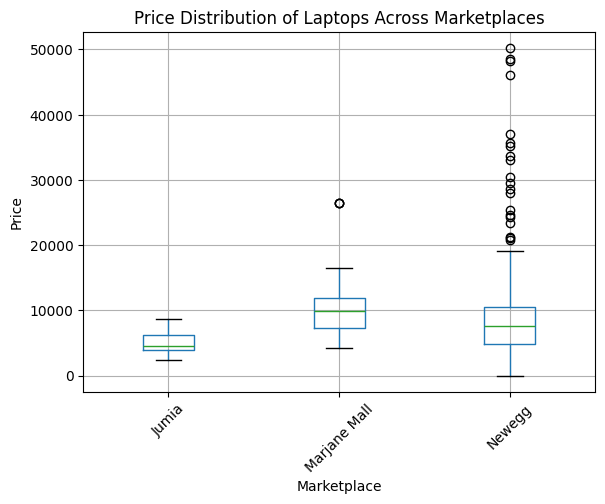

<Figure size 1000x500 with 0 Axes>

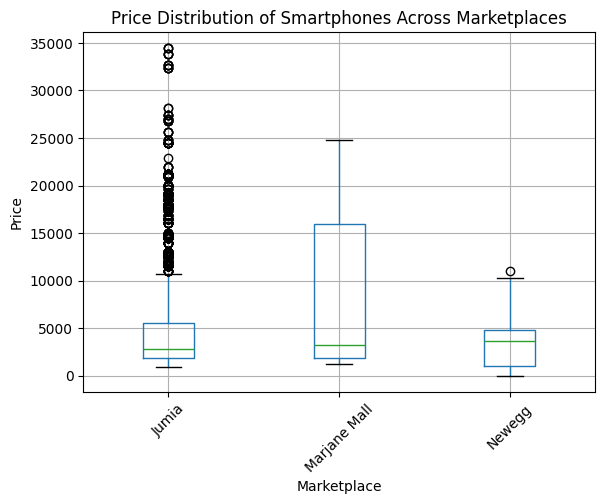

<Figure size 1000x500 with 0 Axes>

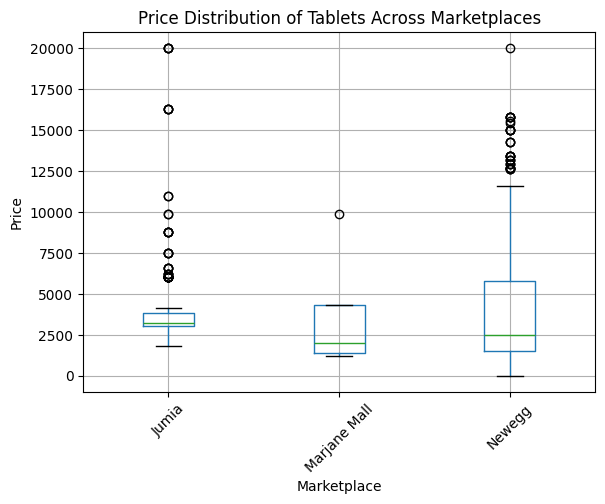

In [39]:
# Convert price columns to numeric
for df in [laptops_df, smartphones_df, tablets_df]:
    df["priceInitial"] = pd.to_numeric(df["priceInitial"], errors="coerce")
    df.dropna(subset=["priceInitial"], inplace=True)

#Comparaison des prix :

# Laptops
plt.figure(figsize=(10, 5))
laptops_df.boxplot(column="priceInitial", by="marketplace")
plt.title("Price Distribution of Laptops Across Marketplaces")
plt.ylabel("Price")
plt.xlabel("Marketplace")
plt.xticks(rotation=45)
plt.suptitle("")
plt.show()

# Smartphones
plt.figure(figsize=(10, 5))
smartphones_df.boxplot(column="priceInitial", by="marketplace")
plt.title("Price Distribution of Smartphones Across Marketplaces")
plt.ylabel("Price")
plt.xlabel("Marketplace")
plt.xticks(rotation=45)
plt.suptitle("")
plt.show()

# Tablets
plt.figure(figsize=(10, 5))
tablets_df.boxplot(column="priceInitial", by="marketplace")
plt.title("Price Distribution of Tablets Across Marketplaces")
plt.ylabel("Price")
plt.xlabel("Marketplace")
plt.xticks(rotation=45)
plt.suptitle("")
plt.show()


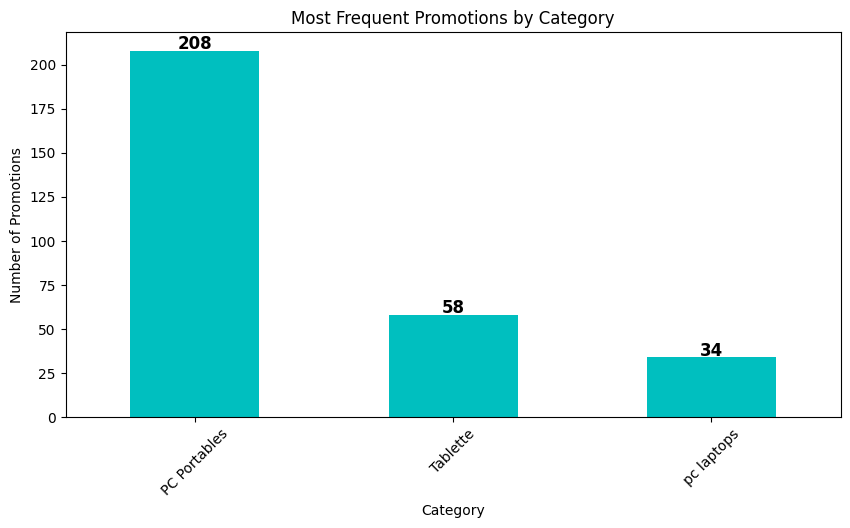

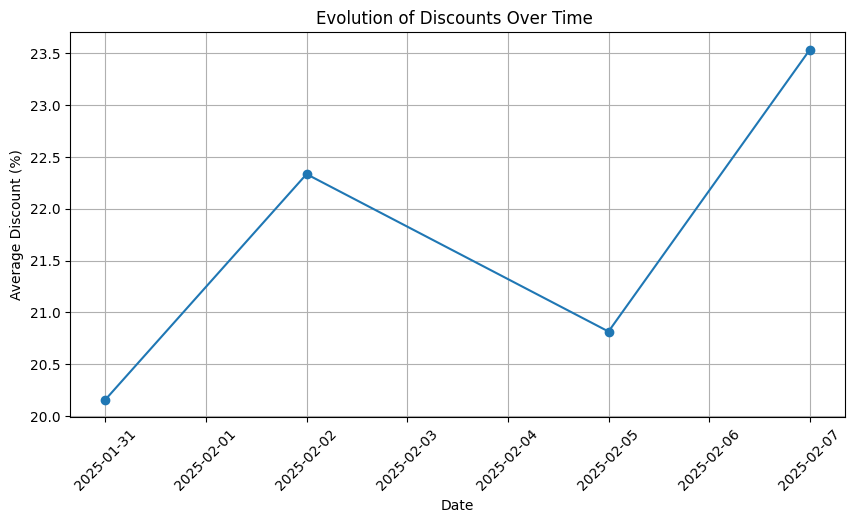

In [45]:
import matplotlib.pyplot as plt
# Ensure category column is properly formatted
all_data["category"] = all_data["category"].str.lower().str.strip()  # Convert to lowercase & remove spaces

# Standardize category names correctly
category_mapping = {
    "laptop": "PC Portables",
    "laptops": "PC Portables",
    "pc portable": "PC Portables",
    "pc portables": "PC Portables",  # Fix variations
    "tablette": "Tablette",
    "tablettes": "Tablette",
    "smartphone": "Smartphones",
    "smartphones": "Smartphones"
}

# Apply the mapping
all_data["category"] = all_data["category"].replace(category_mapping)

# Recalculate promotion counts
promotion_counts = all_data["category"].value_counts()

plt.figure(figsize=(10, 5))
ax = promotion_counts.plot(kind="bar", color="c")  # Store the plot object

plt.title("Most Frequent Promotions by Category")
plt.xlabel("Category")
plt.ylabel("Number of Promotions")
plt.xticks(rotation=45)

# Add category labels above each bar
for i, count in enumerate(promotion_counts):
    ax.text(i, count + 1, str(count), ha='center', fontsize=12, fontweight='bold')

plt.show()


# Plot evolution of promotions over time
plt.figure(figsize=(10, 5))
promo_trend.plot(marker='o', linestyle='-')
plt.title("Evolution of Discounts Over Time ")
plt.xlabel("Date")
plt.ylabel("Average Discount (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
